# TERM DEPOSITS SUBSCRIPTION PREDICTION

# **Problem statement:**
To build a binary classification ML model which to understand the fators influencing a client's decision to subscribe to a term deposite in bank

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

In [3]:
data= pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df= data.copy()

# Basic analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.shape

(11162, 17)

In [7]:
df.size

189754

In [8]:
#categorical variables
num=df.select_dtypes(include=np.number).columns.to_list()
num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [9]:
#numeric variables
cat=df.select_dtypes(exclude=np.number).columns.to_list()
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

**5- point summary for numeric variables**

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**5- point summary for categorical variables**

In [11]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


# Missing value

In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* There is no missing values 

# Duplicated Values

In [13]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


* There is no duplicate values

# Distribution of Variables

 **Distribution of Target variable**

In [14]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

<Axes: xlabel='deposit', ylabel='count'>

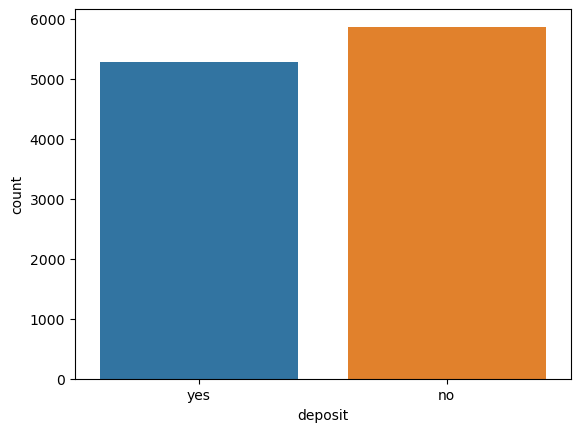

In [15]:
sns.countplot(x=df['deposit'])

* the target variable is balance

**Distribution of numeric independent variables.**

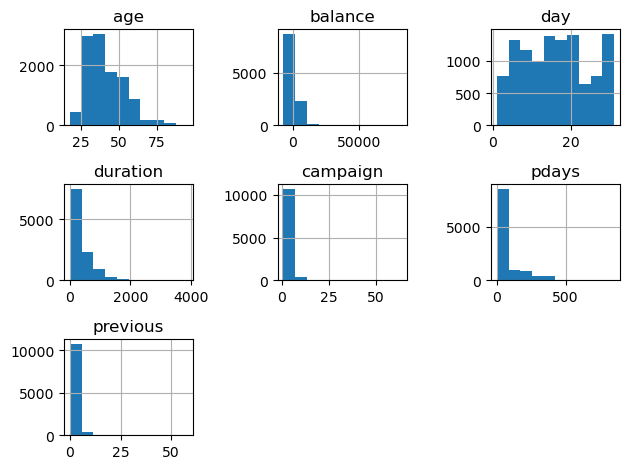

Skewness:


age         0.862780
balance     8.224619
day         0.111330
duration    2.143695
campaign    5.545578
pdays       2.449986
previous    7.335298
dtype: float64

In [16]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df.drop('deposit', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df.drop('deposit', axis = 1).skew(numeric_only=True)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


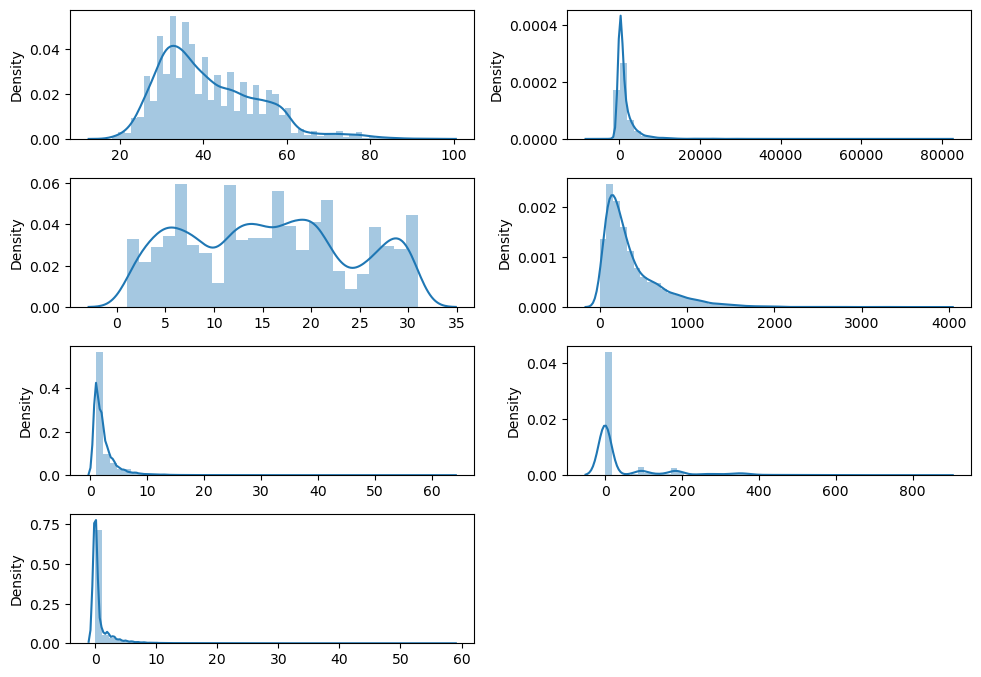

In [17]:
cols  = list(df.select_dtypes(include=np.number).columns)
print(cols)
plt.figure(figsize = (10,10))
for i,j in enumerate(cols):
    plt.subplot(6,2,i+1)
    sns.distplot(x=df[j])
plt.tight_layout()
plt.show()

**Interpretation:** The above plots indicates that all the variables are skewed.

**Distribution of categoric independent variable.**

In [18]:
numerical_features=df.select_dtypes(include='number')
categorical_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
target_variable=['deposite']

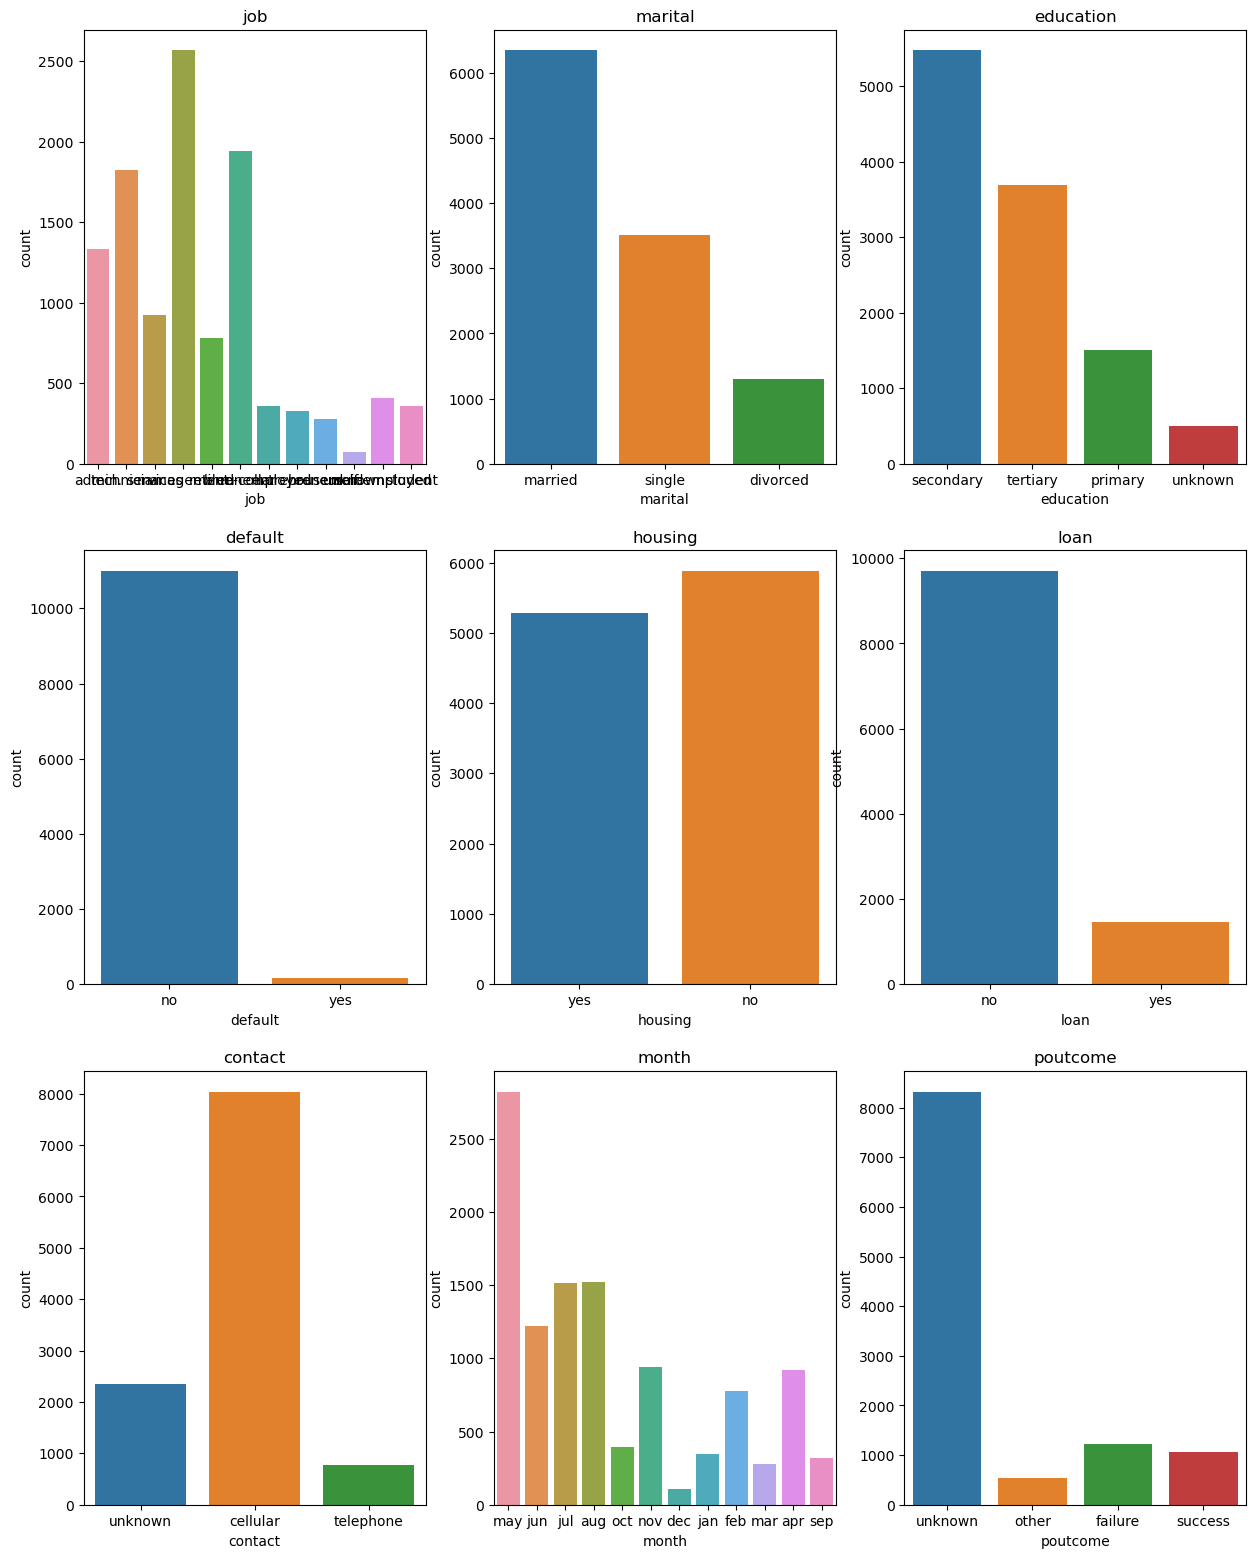

In [19]:

plt.figure(figsize=(15,80))
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(x=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

# finding categorical features and their unique value counts

In [20]:
for col in df.select_dtypes(include='object').columns:
    #print(col)
    print(df[col].value_counts())
    print("\n")

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64


education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64


default
no     10994
yes      168
Name: count, dtype: int64


housing
no     5881
yes    5281
Name: count, dtype: int64


loan
no     9702
yes    1460
Name: count, dtype: int64


contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64


month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64


poutcome
unknown    8326
failure    1228
success    1071
oth

# Bivariate analysis

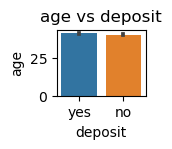

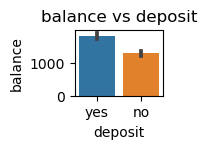

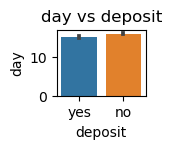

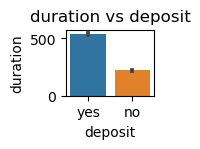

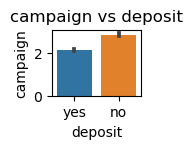

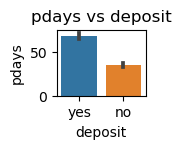

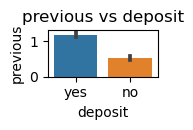

In [21]:

# Assuming numerical_features is a list of column names
for index, feature in enumerate(numerical_features):
    plt.figure(figsize=(8, 6))
    plt.subplot(6, 6, index + 1)
    sns.barplot(x='deposit', y=feature, data=df)
    plt.title(f'{feature} vs deposit')

plt.tight_layout()
plt.show()


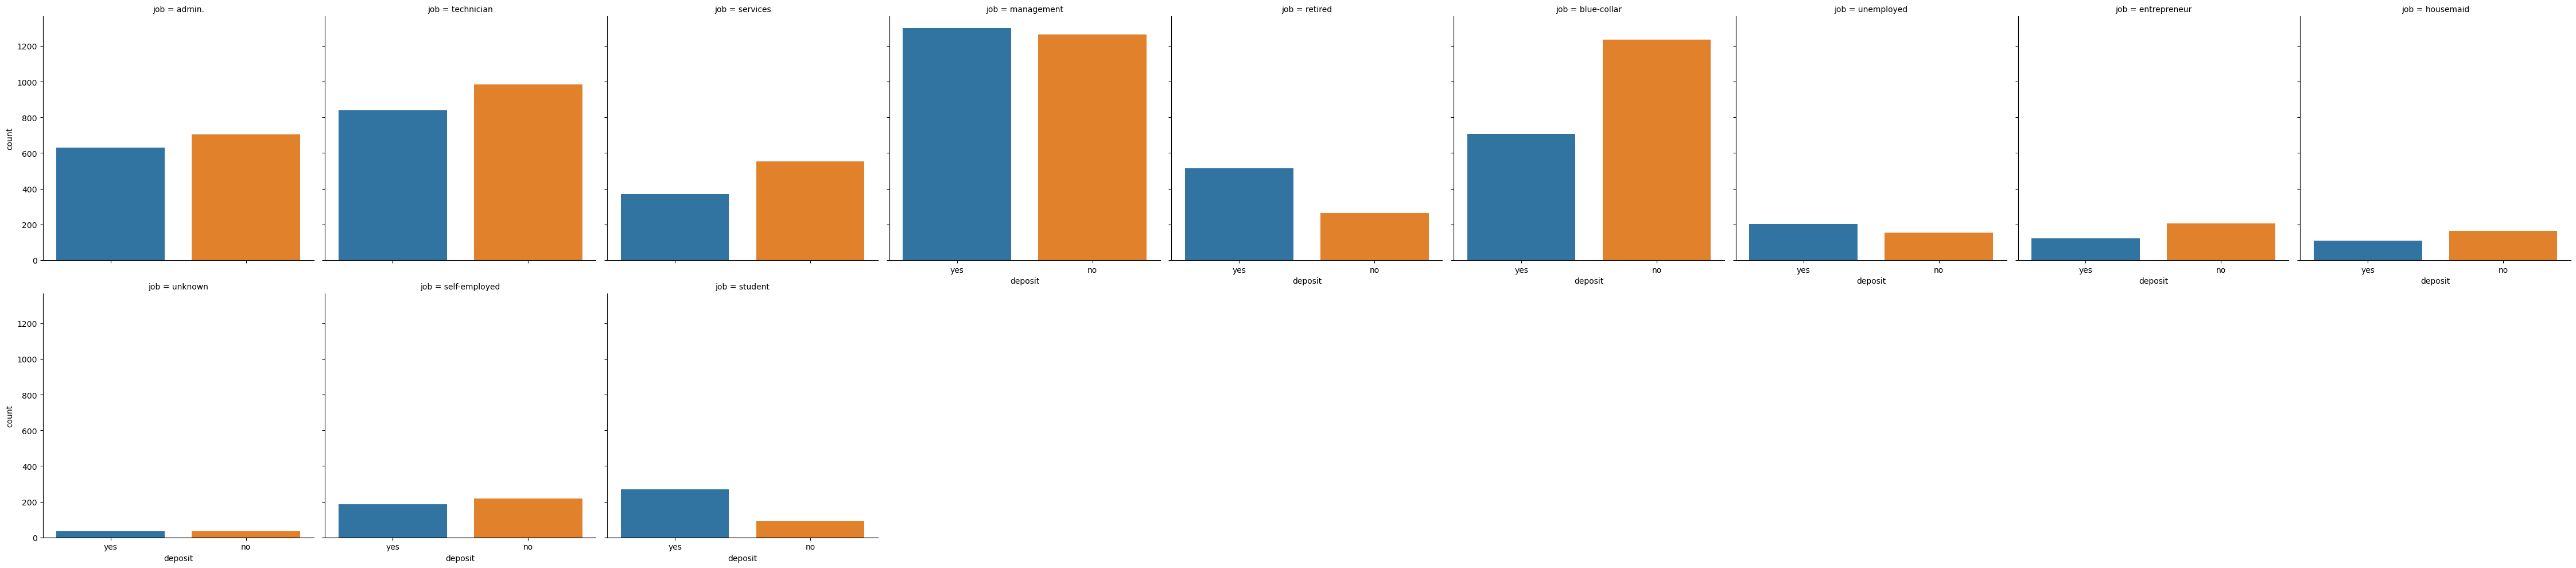

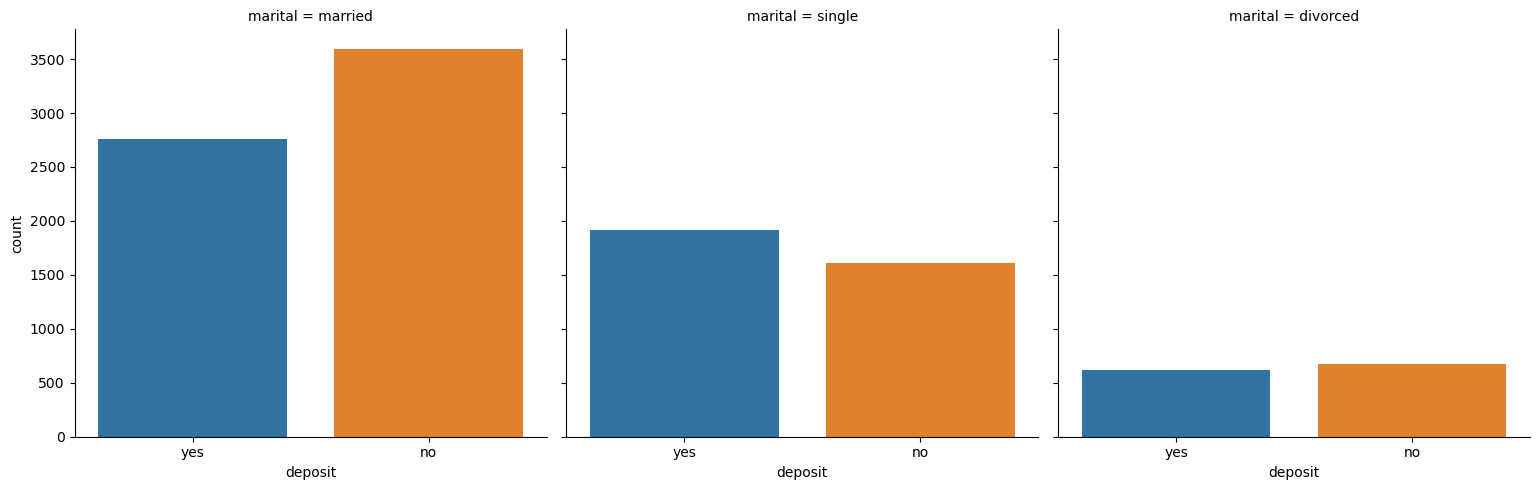

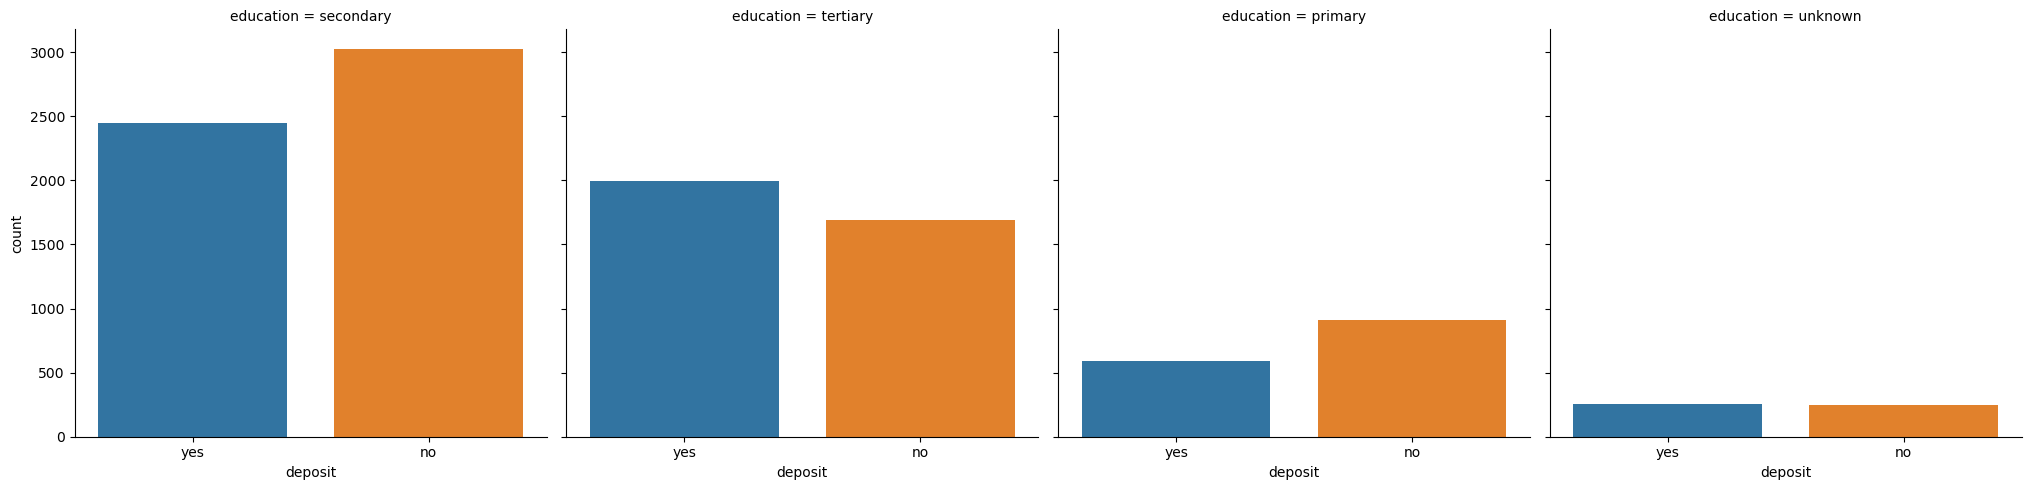

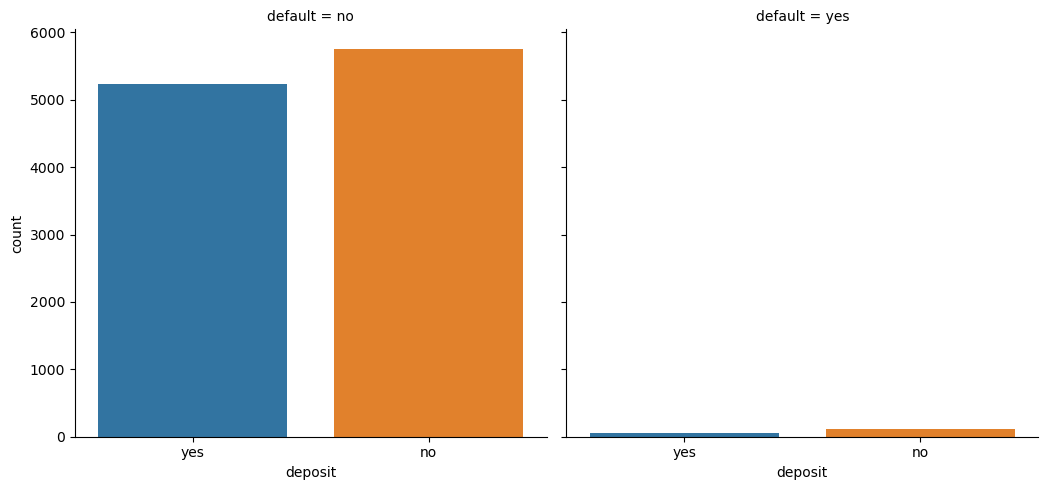

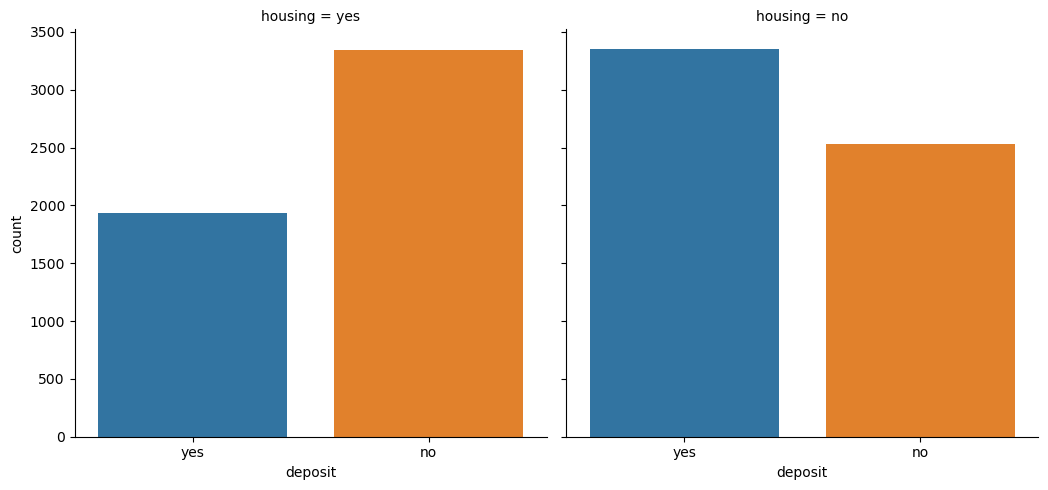

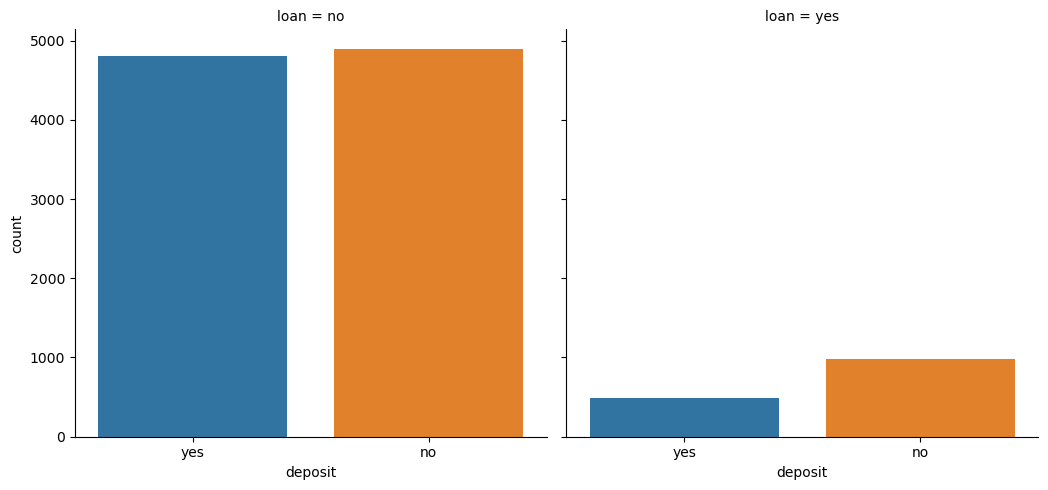

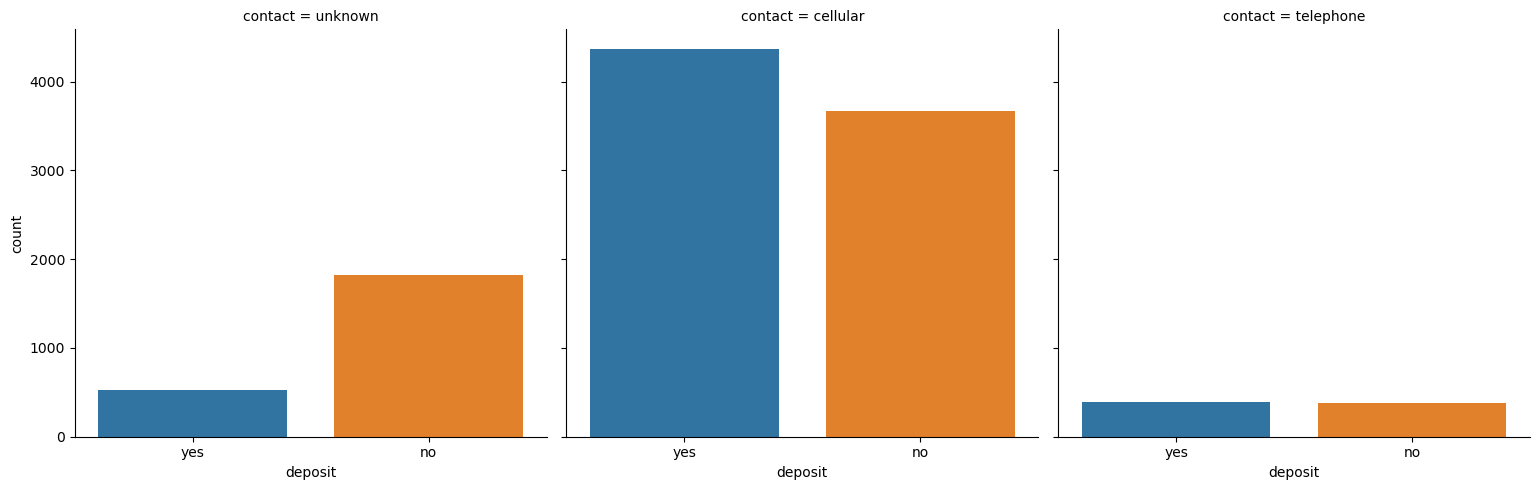

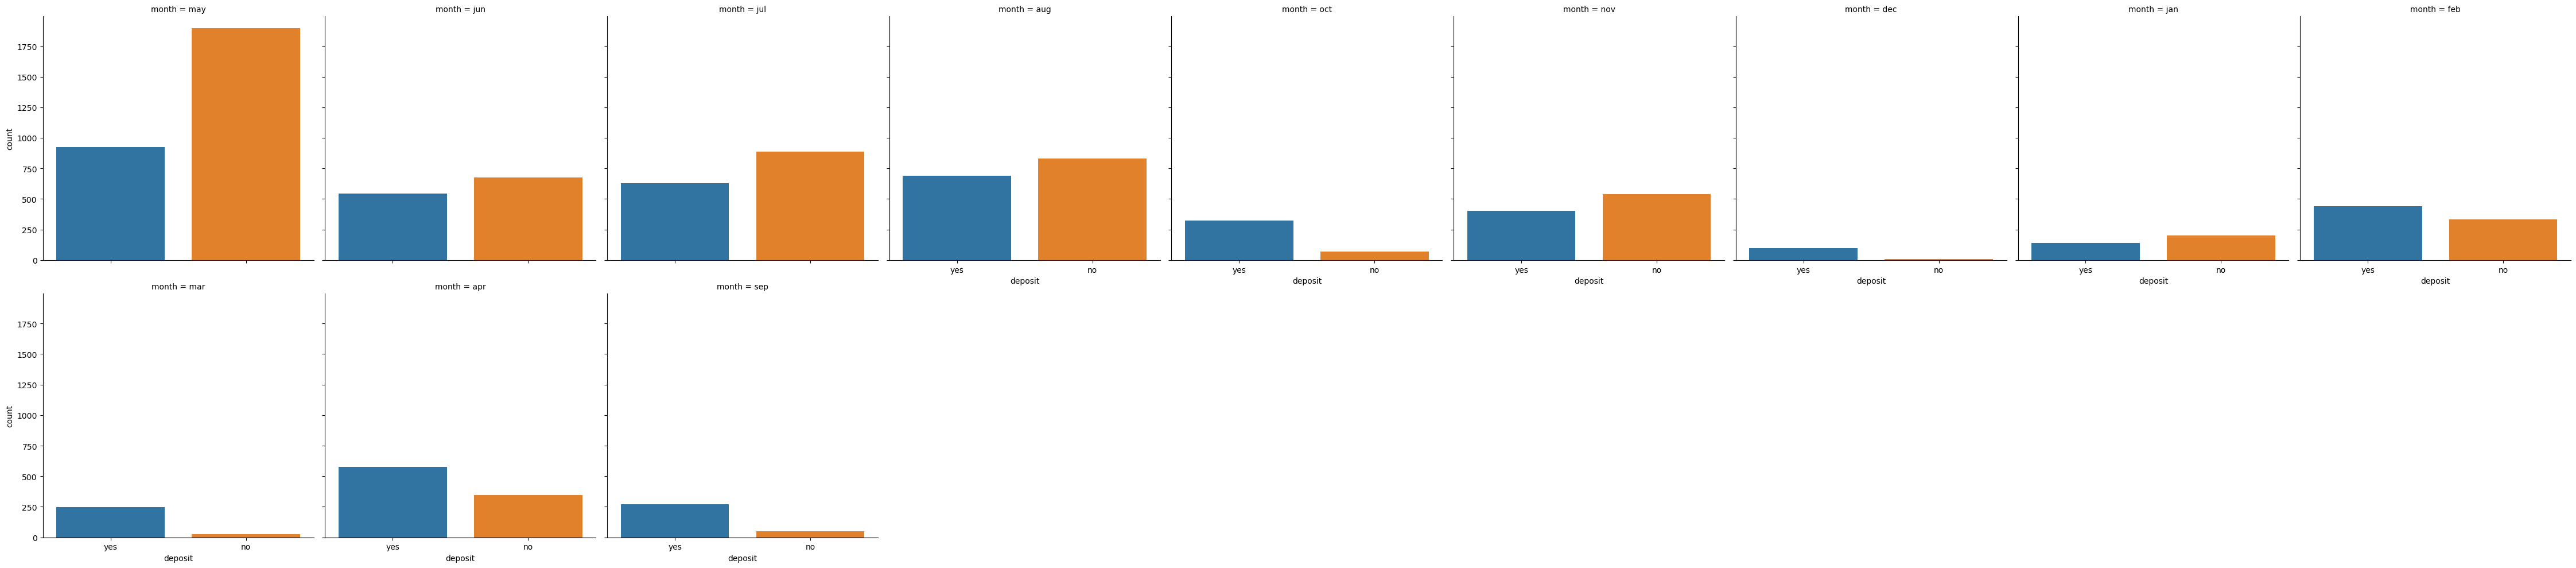

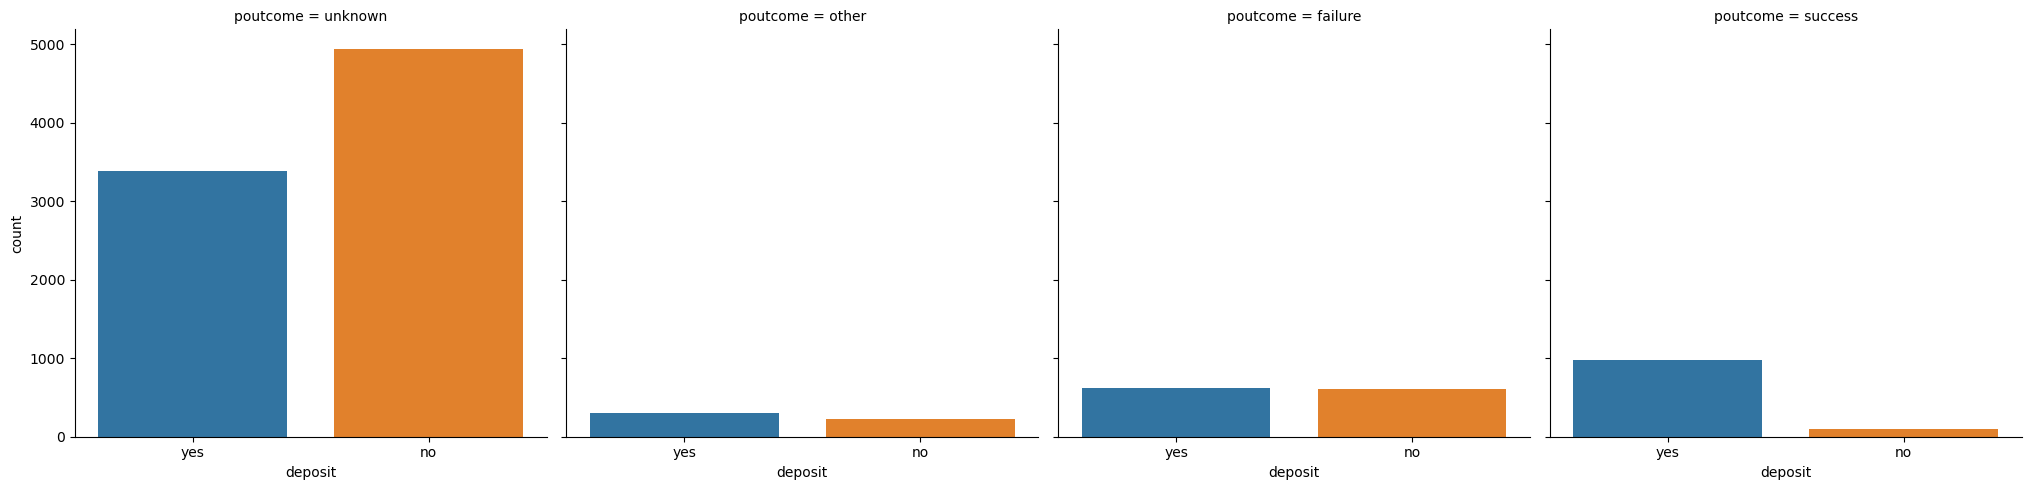

In [22]:
col_wrap_value = len(categorical_features)
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df, col_wrap=col_wrap_value)
plt.show()

* retired client has high interest on deposit
* client who has housing loan seems to be not interested much on deposit
* if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit

# Outliers 

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


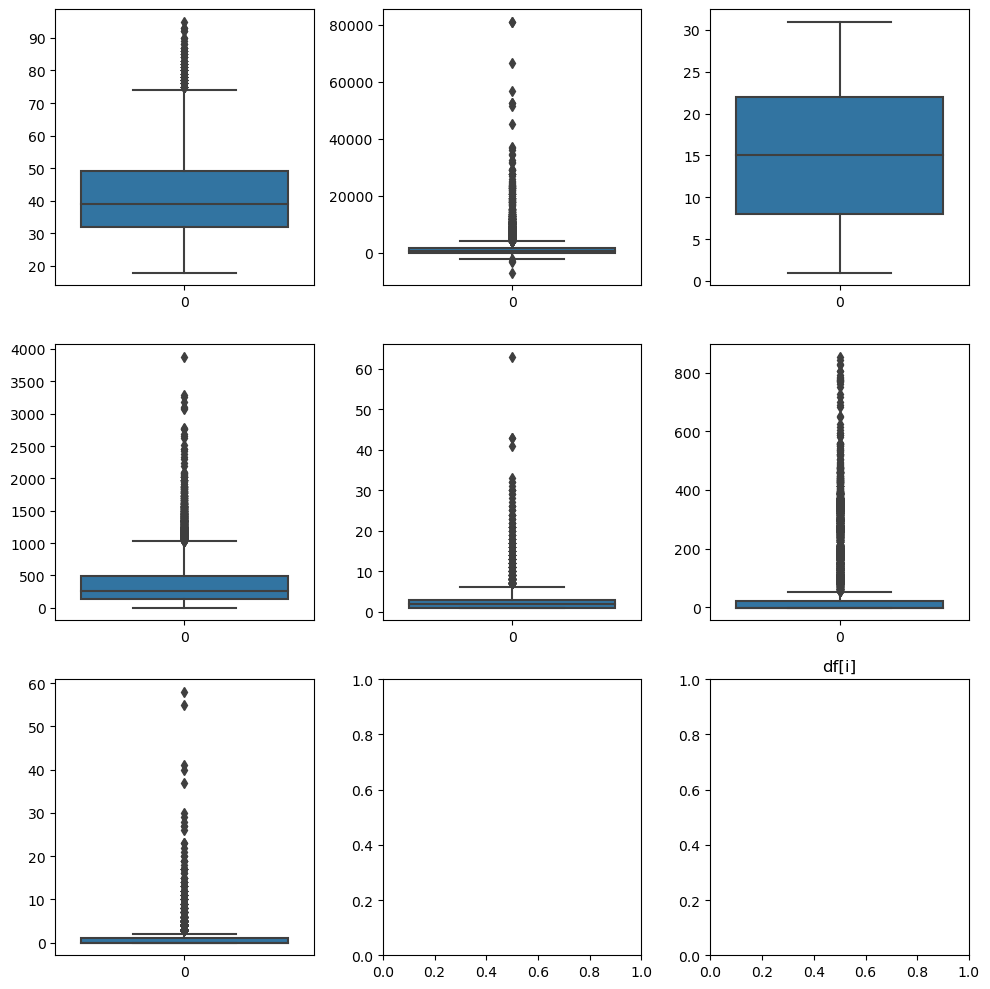

In [23]:
fig, ax= plt.subplots(3,3, figsize=(10,10))
cols=list(df.select_dtypes(include=np.number).columns)
print(cols)
for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

In [24]:
df.std(numeric_only=True)

age           11.913369
balance     3225.413326
day            8.420740
duration     347.128386
campaign       2.722077
pdays        108.758282
previous       2.292007
dtype: float64

In [25]:
df.skew(numeric_only=True)

age         0.862780
balance     8.224619
day         0.111330
duration    2.143695
campaign    5.545578
pdays       2.449986
previous    7.335298
dtype: float64

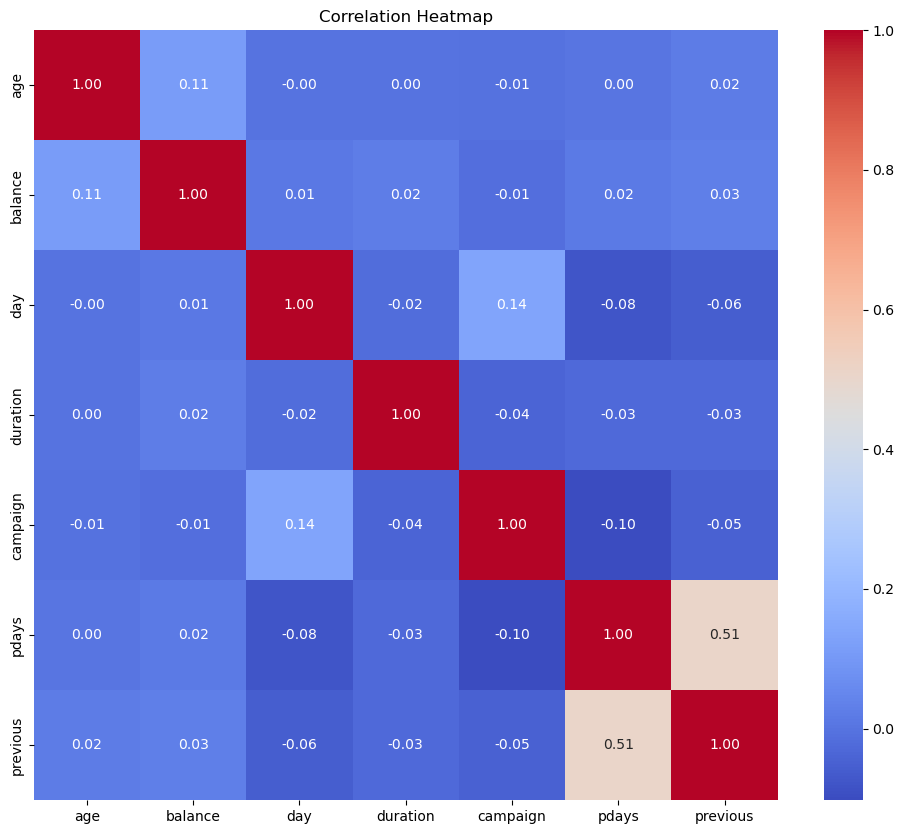

In [26]:
correlation_matrix =numerical_features.corr()
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

 * no feature is highly correlated with each other

**Dropping unwanted columns**

Before dropping the features let us understand the count

In [27]:
df['default'].groupby(df['default']).count()

default
no     10994
yes      168
Name: default, dtype: int64

In [28]:
df.drop(['default'],axis=1, inplace=True)

# Handling Outliers

In [29]:
df['pdays'].groupby(df['pdays']).count()

pdays
-1      8324
 1         8
 2         8
 4         1
 5         2
 6         3
 8         2
 9         7
 10        4
 12        1
 13        3
 14        4
 15        1
 17        2
 20        1
 21        2
 22        1
 24        1
 27        1
 28        3
 29        1
 31        1
 33        1
 34        1
 35        3
 36        1
 37        1
 38        2
 40        3
 41        3
 42        2
 43        2
 44        1
 48        2
 49        1
 50        4
 52        2
 53        2
 55        3
 56        3
 57        6
 58        2
 59        1
 60        2
 61        1
 62        2
 63        6
 64        4
 65        1
 66        2
 67        2
 68        1
 69        2
 70        5
 71        3
 72        1
 73        1
 74        3
 75        4
 76        2
 77        2
 78        4
 79        3
 80       12
 81        6
 82        5
 83       10
 84       14
 85       12
 86       13
 87       34
 88       19
 89       18
 90       32
 91       84
 92      106
 93   

In [30]:
# drop pdays as it has higher -1 value which does not show any significance 
df.drop(['pdays'],axis=1, inplace=True)

In [31]:
df.groupby(['deposit', 'balance'])['balance'].count()
#outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [32]:
df.groupby(['deposit', 'duration'])['duration'].count()
#outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [33]:
df.groupby(['deposit', 'campaign'])['campaign'].count()
#their are lesser number of rows which shows high difference so will remove outliers here

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [34]:
df.groupby(['deposit', 'previous'])['previous'].count()
#their are lesser number of rows which shows high difference so will remove outliers here

deposit  previous
no       0           4940
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

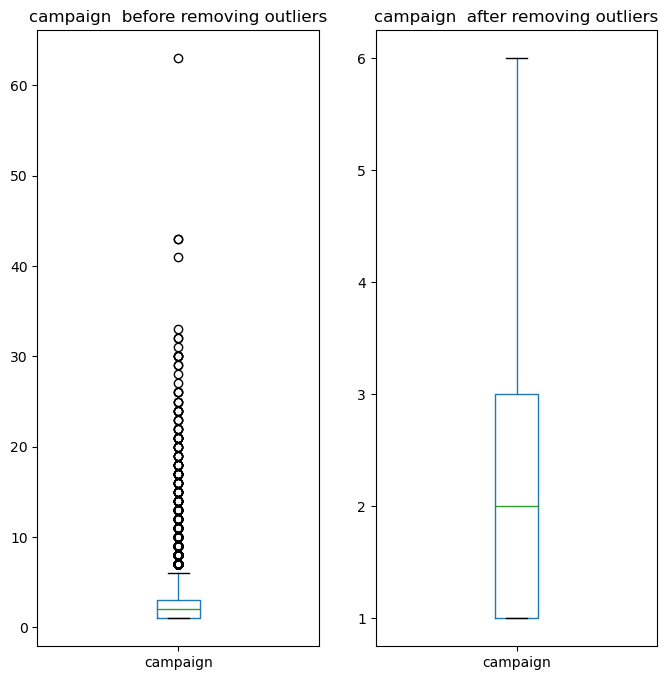

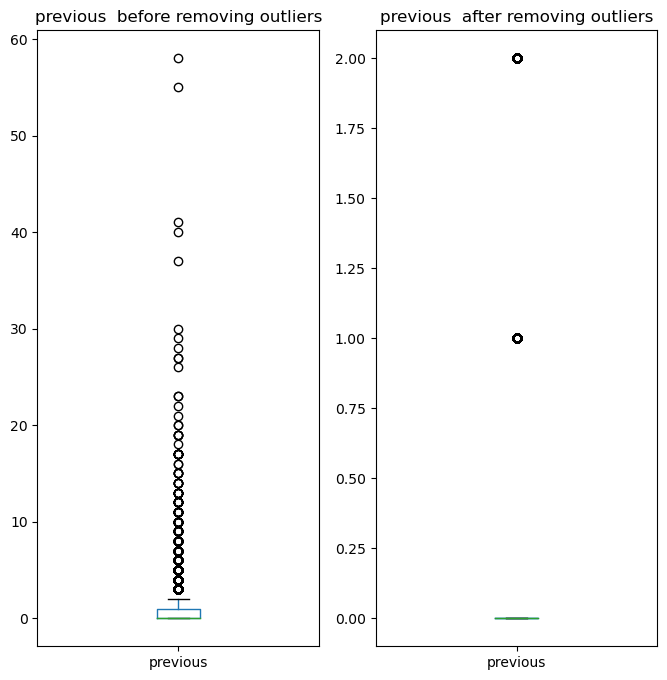

In [35]:
#function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#columns with outliers
outlier_columns=['campaign', 'previous']

#boxplot before and after removal of outliers
for col in outlier_columns:
    plt.figure(figsize=(8,8))
    
    #boxplot before removing outlier
    plt.subplot(1,2,1)
    df.boxplot(column=col)
    plt.title(col+'  before removing outliers')
    plt.grid(False)
    #remove outliers
    data=remove_outliers(df,col)
    
    #boxplot after removing outlier
    plt.subplot(1,2,2)
    data.boxplot(column=col)
    plt.title(col+'  after removing outliers')
    plt.grid(False)
plt.show()

In [36]:
numerical_features#.columns

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [37]:
num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [38]:
df.select_dtypes(include=np.number)

,age,balance,day,duration,campaign,previous
0,59,2343,5,1042,1,0
1,56,45,5,1467,1,0
2,41,1270,5,1389,1,0
3,55,2476,5,579,1,0
4,54,184,5,673,2,0
...,...,...,...,...,...,...
11157,33,1,20,257,1,0
11158,39,733,16,83,4,0
11159,32,29,19,156,2,0
11160,43,0,8,9,2,5


# Encoding

In [39]:
replace_dict = {'yes': 1, 'no': 0}
df['deposit'] = df['deposit'].replace(replace_dict)


In [40]:
replace_dict = {'yes': 1, 'no': 0}
df['housing'] = df['housing'].replace(replace_dict)

In [41]:
replace_dict = {'yes': 1, 'no': 0}
df['loan'] = df['loan'].replace(replace_dict)

In [42]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,1,0,unknown,5,may,1042,1,0,unknown,1
1,56,admin.,married,secondary,45,0,0,unknown,5,may,1467,1,0,unknown,1
2,41,technician,married,secondary,1270,1,0,unknown,5,may,1389,1,0,unknown,1
3,55,services,married,secondary,2476,1,0,unknown,5,may,579,1,0,unknown,1
4,54,admin.,married,tertiary,184,0,0,unknown,5,may,673,2,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,1,0,cellular,20,apr,257,1,0,unknown,0
11158,39,services,married,secondary,733,0,0,unknown,16,jun,83,4,0,unknown,0
11159,32,technician,single,secondary,29,0,0,cellular,19,aug,156,2,0,unknown,0
11160,43,technician,married,secondary,0,0,1,cellular,8,may,9,2,5,failure,0


In [43]:
df_cat=df.select_dtypes(exclude=np.number)
df_cat

,job,marital,education,contact,month,poutcome
0,admin.,married,secondary,unknown,may,unknown
1,admin.,married,secondary,unknown,may,unknown
2,technician,married,secondary,unknown,may,unknown
3,services,married,secondary,unknown,may,unknown
4,admin.,married,tertiary,unknown,may,unknown
...,...,...,...,...,...,...
11157,blue-collar,single,primary,cellular,apr,unknown
11158,services,married,secondary,unknown,jun,unknown
11159,technician,single,secondary,cellular,aug,unknown
11160,technician,married,secondary,cellular,may,failure


In [44]:
dummy_var=pd.get_dummies(data = df_cat, drop_first = True)


In [45]:
dummy_var

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
11158,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
11159,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
11160,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [46]:
# Assuming you have performed dummy encoding and stored the result in a DataFrame called df_encoded

# Convert boolean values to integers (0 or 1)
dummy_var = dummy_var.astype(int)


# Scaling and Transformation

In [47]:
 # Transformation-----balance,loan,duration,campaign,previous
    # scaling --- age,day

In [48]:
df.skew(numeric_only=True)

age         0.862780
balance     8.224619
housing     0.107678
loan        2.190201
day         0.111330
duration    2.143695
campaign    5.545578
previous    7.335298
deposit     0.104798
dtype: float64

In [49]:
from sklearn.preprocessing import PowerTransformer

# Assuming df is your DataFrame and you want to apply power transformation on a subset of columns
columns_to_transform = ['balance','loan','duration','campaign','previous','housing']

# Create a PowerTransformer object
power_transformer = PowerTransformer() 

# Fit the PowerTransformer on the data and transform it
df[columns_to_transform] = power_transformer.fit_transform(df[columns_to_transform])


In [50]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and num is a list of numerical column names
numerical_columns = ['age','day', 'duration']
categorical_columns = [col for col in df.columns if col not in numerical_columns]

# Separate numerical and categorical columns
numerical_df = df[numerical_columns]
categorical_df = df[categorical_columns]

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)

# Combine scaled numerical and categorical columns
scaled_df = pd.concat([scaled_numerical_df, categorical_df], axis=1)


In [51]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df1= pd.concat([scaled_df, dummy_var], axis = 1)

# display first five observations
df1.head()

,age,day,duration,job,marital,education,balance,housing,loan,contact,month,campaign,previous,poutcome,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,-1.265746,1.632491,admin.,married,secondary,0.397351,1.055280,-0.387923,unknown,may,-1.044165,-0.581986,unknown,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1.239676,-1.265746,2.102216,admin.,married,secondary,-0.461562,-0.947616,-0.387923,unknown,may,-1.044165,-0.581986,unknown,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,-0.019470,-1.265746,2.025462,technician,married,secondary,0.039476,1.055280,-0.387923,unknown,may,-1.044165,-0.581986,unknown,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1.155733,-1.265746,0.883221,services,married,secondary,0.439568,1.055280,-0.387923,unknown,may,-1.044165,-0.581986,unknown,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1.071790,-1.265746,1.068398,admin.,married,tertiary,-0.388408,-0.947616,-0.387923,unknown,may,0.273513,-0.581986,unknown,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   day                  11162 non-null  float64
 2   duration             11162 non-null  float64
 3   job                  11162 non-null  object 
 4   marital              11162 non-null  object 
 5   education            11162 non-null  object 
 6   balance              11162 non-null  float64
 7   housing              11162 non-null  float64
 8   loan                 11162 non-null  float64
 9   contact              11162 non-null  object 
 10  month                11162 non-null  object 
 11  campaign             11162 non-null  float64
 12  previous             11162 non-null  float64
 13  poutcome             11162 non-null  object 
 14  deposit              11162 non-null  int64  
 15  job_blue-collar      11162 non-null 

In [53]:
# List of column names to drop
columns_to_drop = ['job','marital','education','contact', 'month','poutcome']

# Drop the columns
df1.drop(columns=columns_to_drop, axis=1, inplace=True)


In [54]:
df1

,age,day,duration,balance,housing,loan,campaign,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,-1.265746,1.632491,0.397351,1.055280,-0.387923,-1.044165,-0.581986,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1.239676,-1.265746,2.102216,-0.461562,-0.947616,-0.387923,-1.044165,-0.581986,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,-0.019470,-1.265746,2.025462,0.039476,1.055280,-0.387923,-1.044165,-0.581986,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1.155733,-1.265746,0.883221,0.439568,1.055280,-0.387923,-1.044165,-0.581986,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1.071790,-1.265746,1.068398,-0.388408,-0.947616,-0.387923,0.273513,-0.581986,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,0.515650,-0.042719,-0.492279,1.055280,-0.387923,-1.044165,-0.581986,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11158,-0.187357,0.040612,-1.143502,-0.157484,-0.947616,-0.387923,1.219465,-0.581986,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
11159,-0.774958,0.396891,-0.554261,-0.471529,-0.947616,-0.387923,0.273513,-0.581986,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
11160,0.148416,-0.909466,-2.761546,-0.493334,-0.947616,2.577830,0.273513,1.861404,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [55]:
# Splitting x and y
from sklearn.model_selection import train_test_split
x=df1.drop('deposit', axis=1)
y=df1['deposit']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.metrics import *

In [57]:
# create an empty dataframe to store the scores for various algorithms
perf_score = pd.DataFrame(index=['Accuracy','Recall','Precision','F1 Score'])

In [58]:
def update_performance (name, model,test,pred):
    # assign 'comp_perf' as global variable
    global perf_score
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    l=[accuracy_score(test, pred), recall_score(test, pred), precision_score(test,pred), f1_score(test,pred)]
    perf_score[name] = l


In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain, ytrain)
ypred_lr = lr.predict(xtest)

In [60]:
update_performance(name = 'Logistic Regression- Base_model',model=lr, test=ytest, pred=ypred_lr)

In [61]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [62]:
nb = GaussianNB()
nb.fit(xtrain, ytrain)
ypred_nb = nb.predict(xtest)

In [63]:
update_performance(name = 'Gaussian Naive_bayes',model=nb, test=ytest, pred=ypred_nb)

In [64]:
bnb = BernoulliNB()
bnb.fit(xtrain, ytrain)
ypred_bnb = bnb.predict(xtest)

In [65]:
update_performance(name = 'Bernoulli Naive_bayes',model=bnb, test=ytest, pred=ypred_bnb)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt=DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred_dt = dt.predict(xtest)

In [68]:
update_performance(name = 'DecisionTreeClassifier',model=dt, test=ytest, pred=ypred_dt)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn= KNeighborsClassifier()

KNN = knn.fit(xtrain,ytrain)    #average='weighted'
knn_pred=KNN.predict(xtest)

In [71]:
update_performance(name = 'KNeighborsClassifier',model=KNN, test=ytest, pred=knn_pred)

In [72]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier

In [73]:

gboost= GradientBoostingClassifier()

gboosting = gboost.fit(xtrain,ytrain)    #average='weighted'
ypred_gboosting=gboosting.predict(xtest)


In [74]:
update_performance(name = 'GradientBoostingClassifier',model=gboosting, test=ytest, pred=ypred_gboosting)

In [75]:
bag= BaggingClassifier()

bagging = bag.fit(xtrain,ytrain)    #average='weighted'
ypred_bagging=bagging.predict(xtest)

In [76]:
update_performance(name = 'BaggingClassifier',model=bagging, test=ytest, pred=ypred_bagging)

In [77]:
abc= AdaBoostClassifier()

aboost = abc.fit(xtrain,ytrain)    #average='weighted'
ypred_aboost=aboost.predict(xtest)

In [78]:
update_performance(name = 'AdaBoostClassifier',model=aboost, test=ytest, pred=ypred_aboost)

In [79]:

rf= RandomForestClassifier()

rfc = rf.fit(xtrain,ytrain)    #average='weighted'
ypred_rfc=rfc.predict(xtest)

In [80]:
update_performance(name = 'RandomForestClassifier',model=rfc, test=ytest, pred=ypred_rfc)

In [81]:
perf_score.T

,Accuracy,Recall,Precision,F1 Score
Logistic Regression- Base_model,0.812808,0.808810,0.801300,0.805037
Gaussian Naive_bayes,0.695477,0.457357,0.828523,0.589372
Bernoulli Naive_bayes,0.751903,0.701968,0.760406,0.730019
DecisionTreeClassifier,0.792656,0.766635,0.792636,0.779419
KNeighborsClassifier,0.794447,0.782568,0.786252,0.784406
GradientBoostingClassifier,0.833856,0.839738,0.817518,0.828479
BaggingClassifier,0.819525,0.809747,0.812030,0.810887
AdaBoostClassifier,0.819973,0.789128,0.826300,0.807287
RandomForestClassifier,0.839678,0.863168,0.812886,0.837273


In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
params = {
    'n_estimators': [10,20, 50],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

rfc1=RandomForestClassifier	()
grid_rfc= GridSearchCV(rfc1, param_grid = params, cv=3, scoring='f1')
grid_rfc.fit(xtrain, ytrain)
grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [84]:

rf1= RandomForestClassifier(n_estimators=50,max_depth=15,min_samples_leaf=1,min_samples_split=5,criterion='gini')

rfc_tune = rf1.fit(xtrain,ytrain)    #average='weighted'
ypred_rfc_tune=rfc_tune.predict(xtest)

In [85]:
update_performance(name = 'RandomForestClassifier_tune',model=rfc_tune, test=ytest, pred=ypred_rfc_tune)

In [87]:
perf_score.T

,Accuracy,Recall,Precision,F1 Score
Logistic Regression- Base_model,0.812808,0.808810,0.801300,0.805037
Gaussian Naive_bayes,0.695477,0.457357,0.828523,0.589372
Bernoulli Naive_bayes,0.751903,0.701968,0.760406,0.730019
DecisionTreeClassifier,0.792656,0.766635,0.792636,0.779419
KNeighborsClassifier,0.794447,0.782568,0.786252,0.784406
GradientBoostingClassifier,0.833856,0.839738,0.817518,0.828479
BaggingClassifier,0.819525,0.809747,0.812030,0.810887
AdaBoostClassifier,0.819973,0.789128,0.826300,0.807287
RandomForestClassifier,0.839678,0.863168,0.812886,0.837273
RandomForestClassifier_tune,0.834304,0.857545,0.807590,0.831818


# **Conclusion**
On comapring accuracy score of the above models **RandomForestClassifier** gives the highest **accuracy_socre 83.96%**